### 1.Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report


### 2.Load the dataset

In [2]:
df = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\student+performance\\student\\student-por.csv", sep=';')

In [3]:
# Display basic info about the dataset

print("Initial data overview:")
df.head()
#print("\nSummary:")
#print(df.info())


Initial data overview:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# Check for missing values

print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### 3.Feature Engineering

In [5]:
# Work on a copy of the original DataFrame to avoid conflicts
df2 = df.copy()

In [6]:
# Create the target variable: 'pass' (1 = pass, 0 = fail)
df2['pass'] = (df2['G3'] >= 10).astype(int)

# Drop the original grade columns (G1, G2, G3)
df2 = df2.drop(['G1', 'G2', 'G3'], axis=1)

In [7]:
df2.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,6,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,2,1
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,1


In [8]:
# Identify categorical columns (object dtype)
categorical_cols = df2.select_dtypes(include=['object']).columns
categorical_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [9]:
# Identify numeric columns (excluding the target column 'pass')
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns.drop('pass', errors='ignore')
numeric_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [10]:
# Encode categorical variables using one-hot encoding

df_encoded = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)
df_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,True,False,False,False,False,True,False,True,True,False
645,18,3,1,1,2,0,4,3,4,1,...,True,False,False,True,False,False,True,True,True,False
646,18,1,1,2,2,0,1,1,1,1,...,True,False,False,False,False,True,True,True,False,False
647,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False


In [11]:
# Scale numeric features

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

### 4.Train/Test Split

In [12]:
X = df_encoded.drop('pass', axis=1)
y = df_encoded['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 5.Model Training

In [13]:
# 1. Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

In [14]:
# 2. Decision Tree

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [15]:
# Evaluation Function

def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)



=== Logistic Regression ===
Accuracy: 0.8
F1 Score: 0.8839285714285715
Confusion Matrix:
 [[ 5 15]
 [11 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.25      0.28        20
           1       0.87      0.90      0.88       110

    accuracy                           0.80       130
   macro avg       0.59      0.57      0.58       130
weighted avg       0.78      0.80      0.79       130


=== Decision Tree ===
Accuracy: 0.7769230769230769
F1 Score: 0.8699551569506726
Confusion Matrix:
 [[ 4 16]
 [13 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.20      0.22        20
           1       0.86      0.88      0.87       110

    accuracy                           0.78       130
   macro avg       0.55      0.54      0.54       130
weighted avg       0.76      0.78      0.77       130



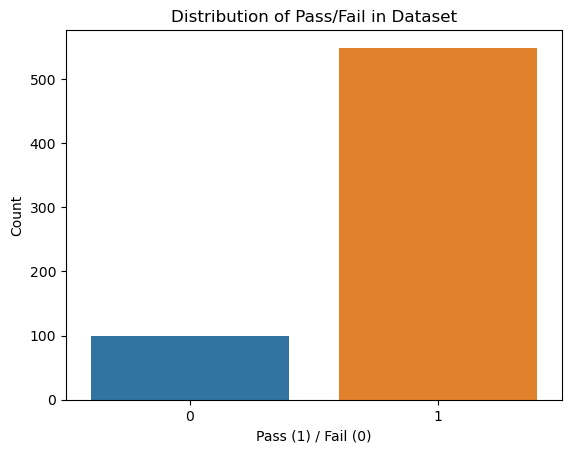

In [16]:
# Optional: Visualize the distribution of the target variable
sns.countplot(x='pass', data=df2)
plt.title('Distribution of Pass/Fail in Dataset')
plt.xlabel('Pass (1) / Fail (0)')
plt.ylabel('Count')
plt.show()
